In [1]:
# Import data

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from hevisum_dataset import importDataset
import numpy as np


/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <FB2FD416-6C4D-3621-B677-61F07C02A3C5> /opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/spatialhackathon/lib/python3.9/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/spatialhackathon/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might b

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
from hevisum_dataset import importDataset
import os
os.chdir("/Users/deweywang/Desktop/GitHub/HEVisum/")

# ËºâÂÖ•Ë≥áÊñô
center_tile = torch.load("./train_dataset_sep_v2/tiles.pt")
subtiles = torch.load("./train_dataset_sep_v2/subtiles.pt")
neighbor_tiles = torch.load("./train_dataset_sep_v2/neighbor_tiles.pt")
label = torch.load("./train_dataset_sep_v2/labels.pt")
meta = torch.load("./train_dataset_sep_v2/meta_info.pt")

/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_25126/3077069298.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  center_tile = torch.load("./train_dataset_sep

In [83]:
# Ê≠£Á¢∫ÊñπÂºè

raw_coords = []
for _meta in meta:
    if _meta is not None:
        _, x, y = _meta
    else:
        x, y = 0, 0
    raw_coords.append([x, y])

raw_coords = np.array(raw_coords)


coord_scaler = StandardScaler()
normalized_coords = coord_scaler.fit_transform(raw_coords)
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np

# ‚úÖ ÂÆâÂÖ®ËΩâÊèõÔºöÈÅøÂÖç ToTensor() Â∞ç Tensor Â§±Êïà
class SafeTransform:
    def __init__(self):
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
        ])

    def __call__(self, img):
        if isinstance(img, torch.Tensor):
            return img  # Â∑≤ÊòØ TensorÔºå‰∏çÂÜçËΩâÊèõ
        return self.transform(img)

# ‚úÖ Dataset ÂÆöÁæ©
class importDataset(Dataset):
    def __init__(self, center_tile, subtiles, neighbor_tiles, label, meta=None, transform=None):
        self.center_tile = center_tile
        self.subtiles = subtiles
        self.neighbor_tiles = neighbor_tiles
        self.label = label
        self.meta = meta if meta is not None else [None] * len(center_tile)

        self.transform = transform or SafeTransform()

    def __len__(self):
        return len(self.center_tile)

    def __getitem__(self, idx):
        # ‚úÖ ÂÆâÂÖ®ËΩâÊèõ‰∏≠ÂøÉ tile
        center_tile = self.transform(self.center_tile[idx])  # shape: (3, H, W)

        # ‚úÖ Subtiles: List of (H, W, 3)
        subtiles = torch.stack([self.transform(tile) for tile in self.subtiles[idx]])  # (9, 3, h, w)

        # ‚úÖ Neighbor tiles: List of (H, W, 3)
        neighbor_tiles = torch.stack([self.transform(tile) for tile in self.neighbor_tiles[idx]])  # (8, 3, H, W)

        # ‚úÖ Label
        label = torch.tensor(self.label[idx], dtype=torch.float32)

        # ‚úÖ Normalized coordinates (x, y)
        meta = self.meta[idx]  # already normalized
        meta_tensor = torch.tensor(meta, dtype=torch.float)


        return {
            'center_tile': center_tile,
            'subtiles': subtiles,
            'neighbor_tiles': neighbor_tiles,
            'label': label,
            'coords': meta_tensor
        }

# ====== Step 2: Âª∫Á´ã Dataset ======
train_dataset = importDataset(
    center_tile=center_tile,
    subtiles=subtiles,
    neighbor_tiles=neighbor_tiles,
    label=label,
    meta=df_scaled[['x_norm', 'y_norm']].astype(float).to_numpy()
)

In [82]:
df_scaled

slide_id     x     y     x_std     y_std    x_norm    y_norm
0         S_1  1554  1297  1.015115  0.468132  0.815877  0.585326
1         S_1   462  1502 -1.706209  1.191686  0.087392  0.754328
2         S_1  1488  1548  0.850639  1.354045  0.771848  0.792251
3         S_1  1725  1182  1.441256  0.062235  0.929953  0.490519
4         S_1   581  1113 -1.409655 -0.181303  0.166778  0.433636
...       ...   ...   ...       ...       ...       ...       ...
8344      S_6  1173   842  0.935331 -1.162485      0.75  0.200299
8345      S_6  1237   775  1.479388 -1.608359  0.887931  0.100149
8346      S_6   903   953 -1.359909 -0.423799  0.168103  0.366218
8347      S_6   954  1310 -0.926364  1.951975  0.278017  0.899851
8348      S_6  1186   864  1.045843 -1.016079  0.778017  0.233184

[8349 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def scale_meta(meta):
    """
    Â∞á meta Ë≥áÊñô‰æùÁÖß slide id ÂàÜÁµÑÔºåÂ∞ç x Ëàá y ÂàÜÂà•ÂÅöÊ®ôÊ∫ñÂåñÔºàStandardScalerÔºâËàá 0-1 Ê≠£Ë¶èÂåñÔºàMinMaxScalerÔºâ„ÄÇ
    
    ÂèÉÊï∏:
        meta: list of tupleÔºåÊ†ºÂºèÂ¶Ç [('S_1', 1554, 1297), ('S_1', 462, 1502), ...]
        
    ÂõûÂÇ≥:
        DataFrameÔºåÈô§‰∫ÜÂéüÊú¨ÁöÑ slide_id„ÄÅx„ÄÅy ‰πãÂ§ñÔºåÈÇÑÊúÉÊñ∞Â¢ûÂõõÂÄãÊ¨Ñ‰ΩçÔºö
            - x_std, y_std: Ê®ôÊ∫ñÂåñÂæåÁöÑÂ∫ßÊ®ô
            - x_norm, y_norm: 0-1 Ê≠£Ë¶èÂåñÂæåÁöÑÂ∫ßÊ®ô
    """
    # Âª∫Á´ã DataFrame
    df = pd.DataFrame(meta, columns=['slide_id', 'x', 'y'])
    
    # ÂàùÂßãÂåñÊñ∞Ê¨Ñ‰Ωç
    df['x_std'] = None
    df['y_std'] = None
    df['x_norm'] = None
    df['y_norm'] = None
    
    # ‰æùÁÖß slide_id ÂàÜÁµÑÂæåËôïÁêÜ
    for slide, group in df.groupby('slide_id'):
        # ÂèñÂá∫Ë©≤ÁµÑ x Ëàá y Ë≥áÊñôÔºàËΩâÊèõÁÇ∫ 2D arrayÔºâ
        x = group[['x']].values
        y = group[['y']].values
        
        # Ê®ôÊ∫ñÂåñÔºöStandardScaler
        standard_scaler_x = StandardScaler()
        standard_scaler_y = StandardScaler()
        x_std = standard_scaler_x.fit_transform(x)
        y_std = standard_scaler_y.fit_transform(y)
        
        # Ê≠£Ë¶èÂåñÔºöMinMaxScaler
        minmax_scaler_x = MinMaxScaler()
        minmax_scaler_y = MinMaxScaler()
        x_norm = minmax_scaler_x.fit_transform(x)
        y_norm = minmax_scaler_y.fit_transform(y)
        
        # Â∞áÁµêÊûúÂ°´Âõû DataFrameÔºàflatten array ‰ª•‰æøÂ≠òÂÖ•Ê¨Ñ‰ΩçÔºâ
        df.loc[group.index, 'x_std'] = x_std.flatten()
        df.loc[group.index, 'y_std'] = y_std.flatten()
        df.loc[group.index, 'x_norm'] = x_norm.flatten()
        df.loc[group.index, 'y_norm'] = y_norm.flatten()
    
    return df

df_scaled = scale_meta(meta)
print(df_scaled)


     slide_id     x     y     x_std     y_std    x_norm    y_norm
0         S_1  1554  1297  1.015115  0.468132  0.815877  0.585326
1         S_1   462  1502 -1.706209  1.191686  0.087392  0.754328
2         S_1  1488  1548  0.850639  1.354045  0.771848  0.792251
3         S_1  1725  1182  1.441256  0.062235  0.929953  0.490519
4         S_1   581  1113 -1.409655 -0.181303  0.166778  0.433636
...       ...   ...   ...       ...       ...       ...       ...
8344      S_6  1173   842  0.935331 -1.162485      0.75  0.200299
8345      S_6  1237   775  1.479388 -1.608359  0.887931  0.100149
8346      S_6   903   953 -1.359909 -0.423799  0.168103  0.366218
8347      S_6   954  1310 -0.926364  1.951975  0.278017  0.899851
8348      S_6  1186   864  1.045843 -1.016079  0.778017  0.233184

[8349 rows x 7 columns]


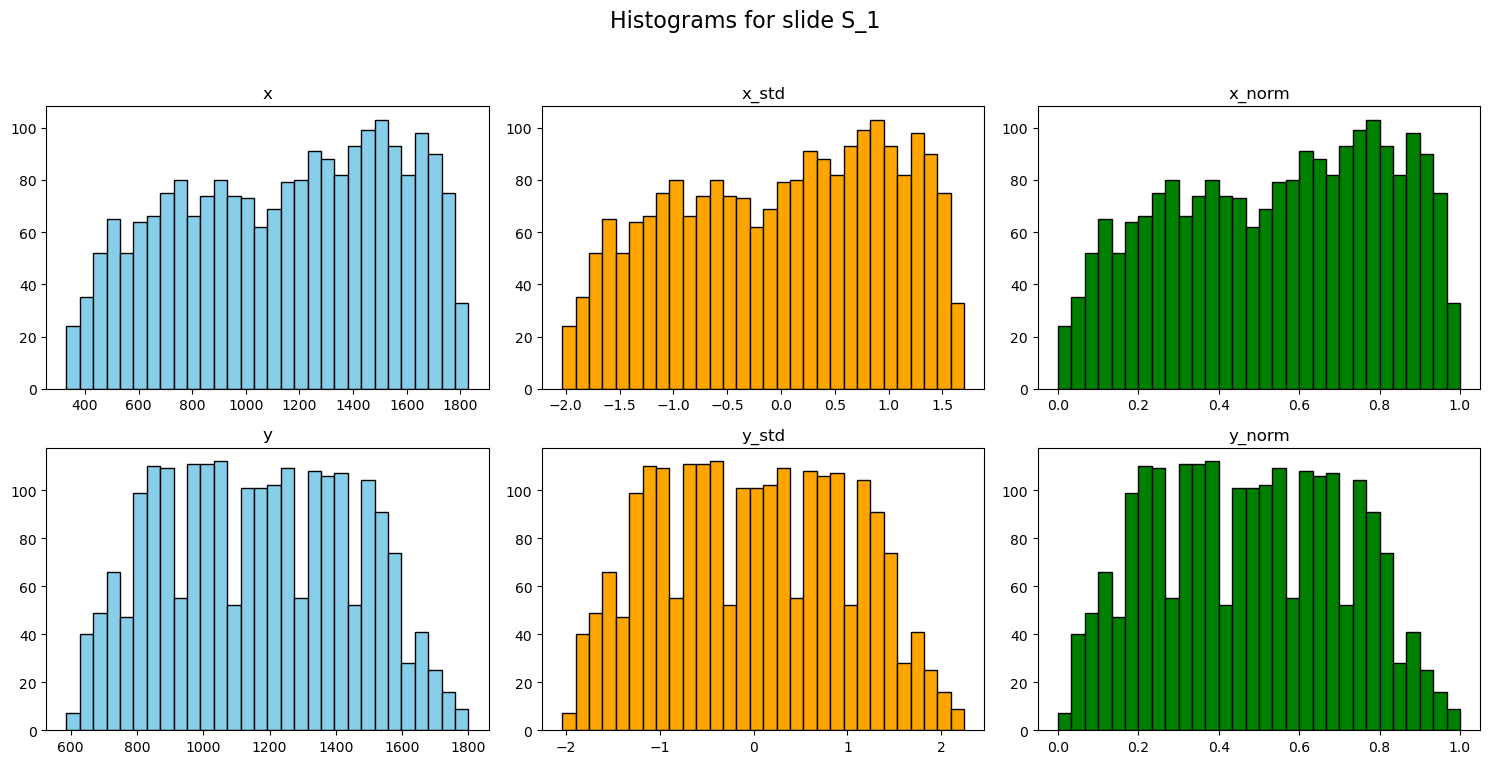

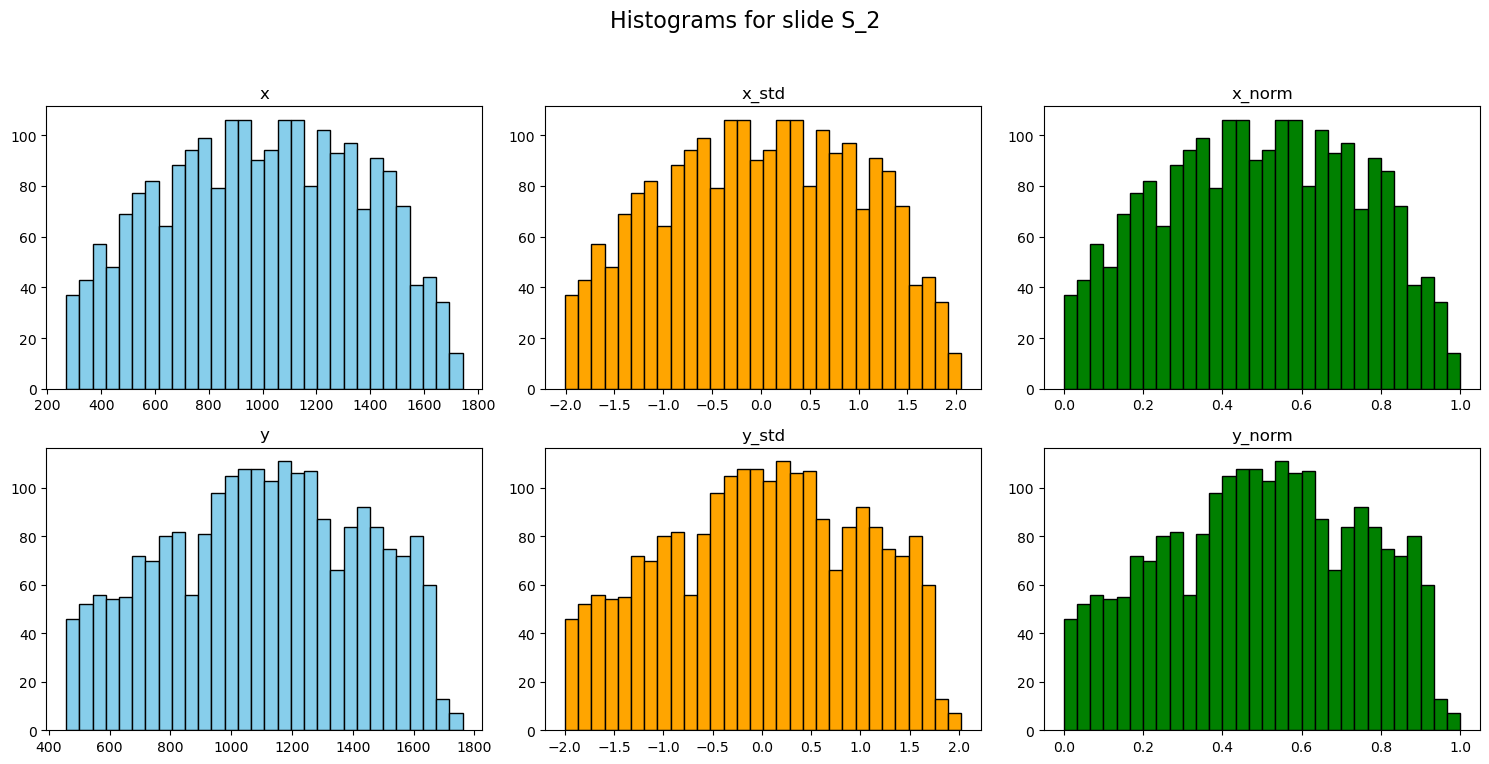

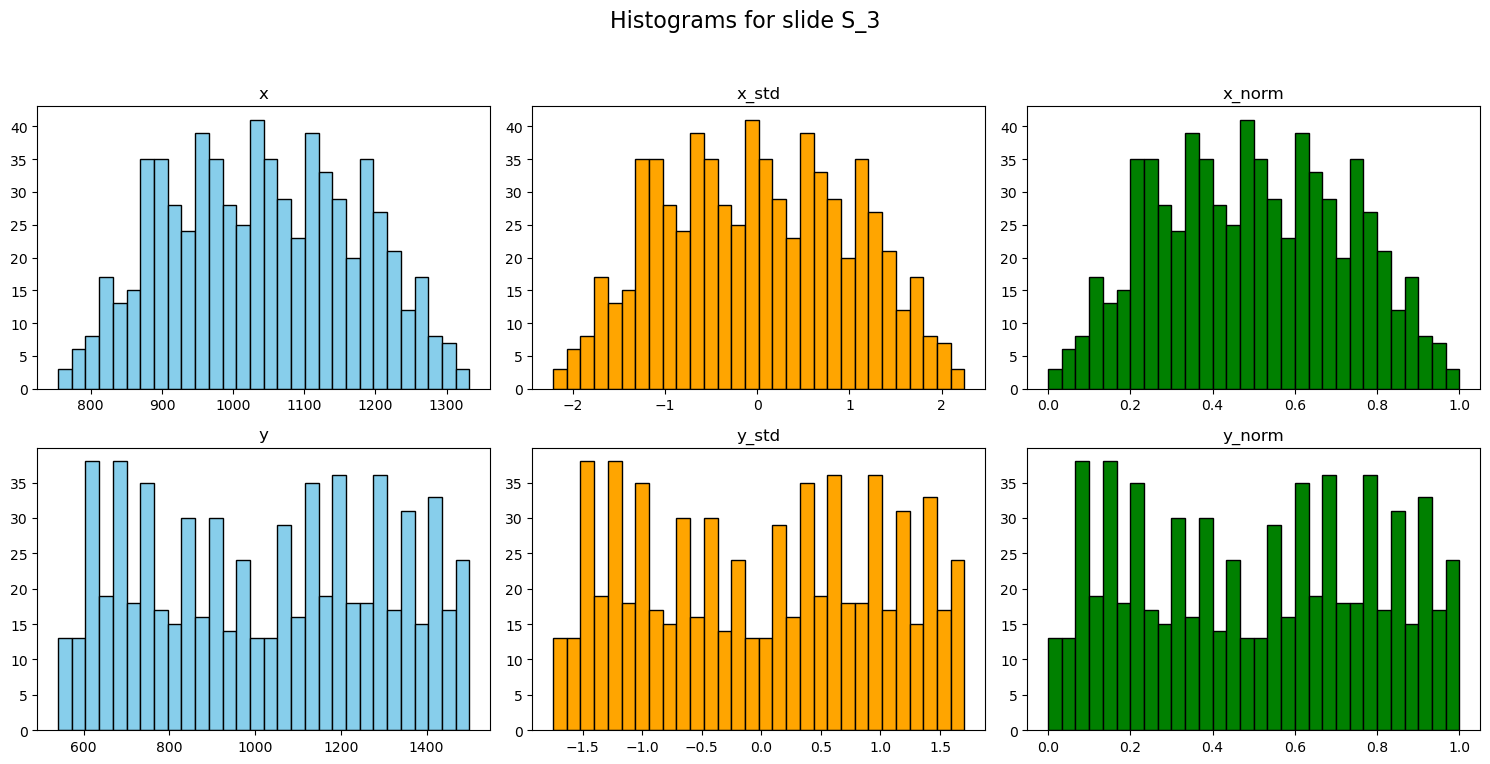

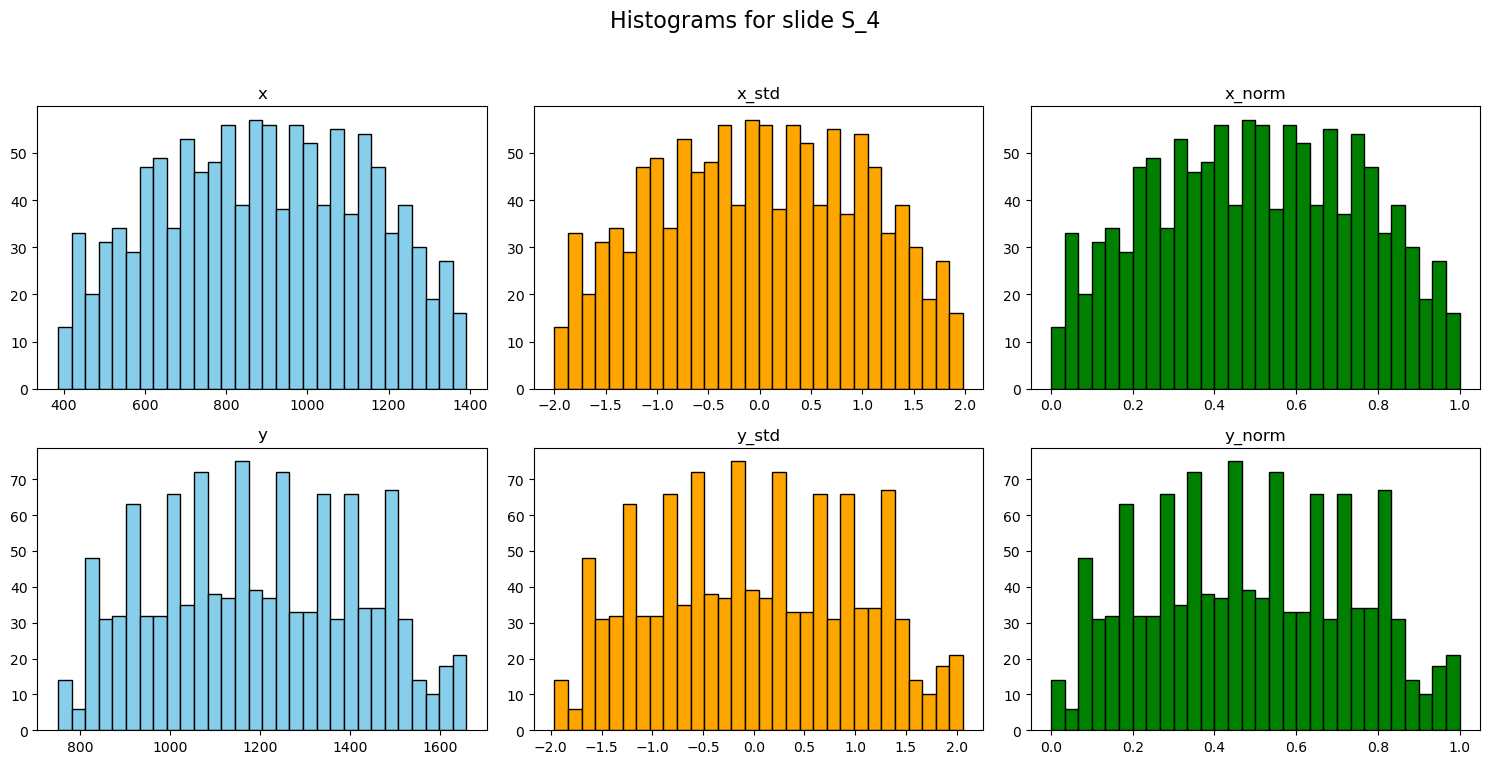

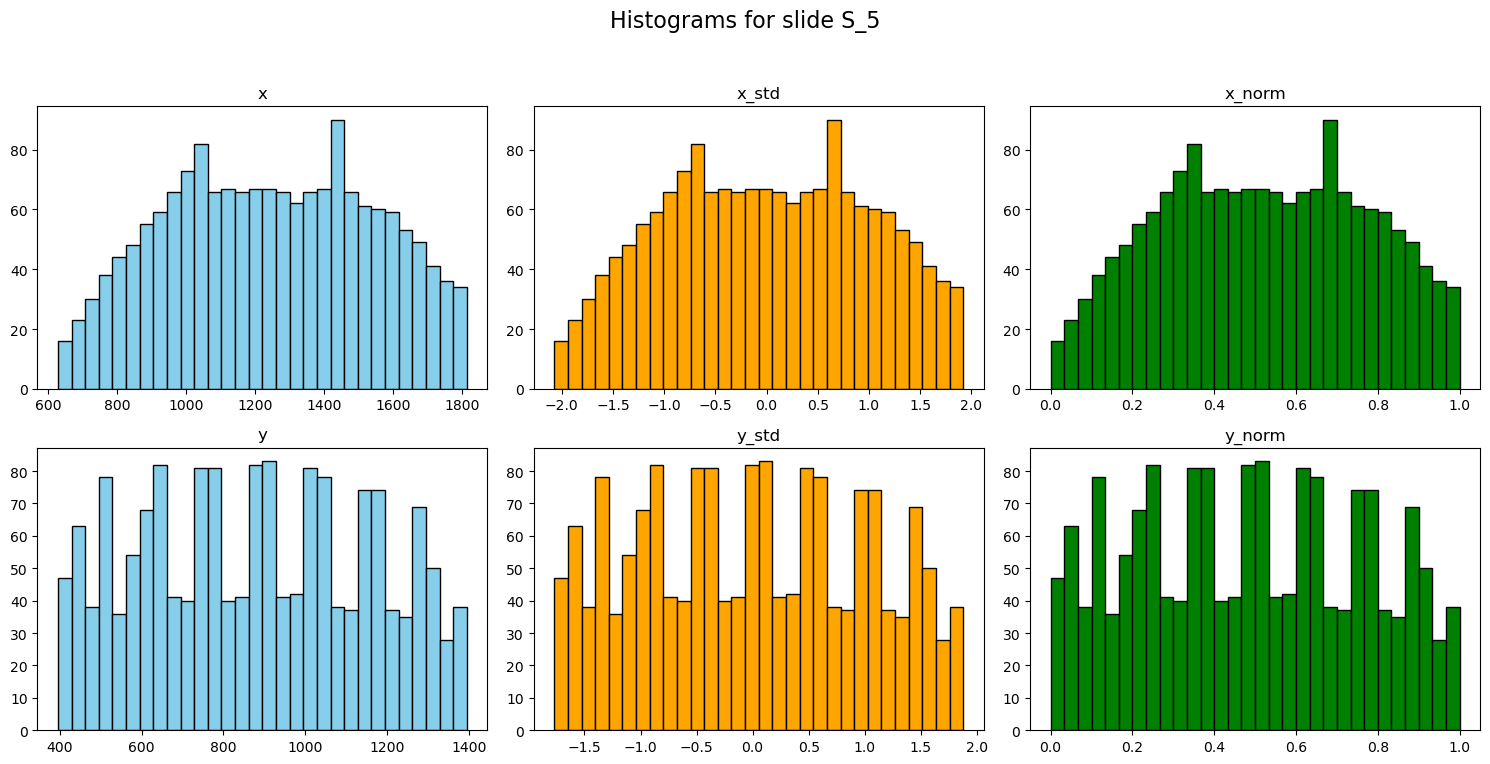

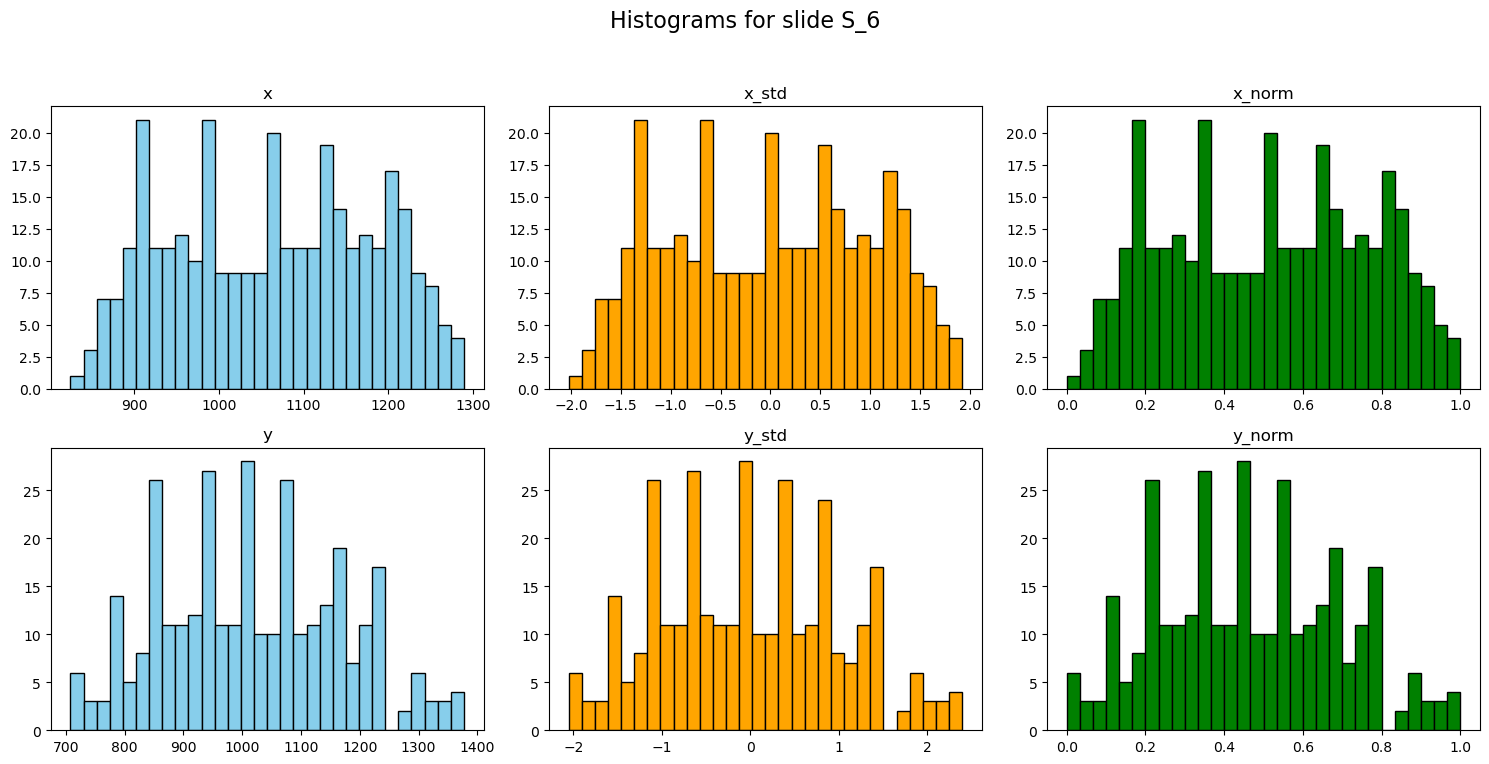

In [39]:
import matplotlib.pyplot as plt

def plot_histograms_by_slide(df):
    """
    ‰æùÁÖß slide_id ÂàÜÁµÑÔºåÂ∞çÊØèÂÄã slide Áï´Âá∫ x, y, x_std, y_std, x_norm, y_norm ÁöÑ histogram„ÄÇ
    df ÊáâË©≤ÂåÖÂê´‰ª•‰∏ãÊ¨Ñ‰ΩçÔºöslide_id, x, y, x_std, y_std, x_norm, y_norm
    """
    slides = df['slide_id'].unique()
    
    for slide in slides:
        df_slide = df[df['slide_id'] == slide]
        
        # Âª∫Á´ã 2 x 3 ÁöÑÂ≠êÂúñ (2Ë°å3Âàó)
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        fig.suptitle(f"Histograms for slide {slide}", fontsize=16)
        
        # Á¨¨‰∏ÄÂàóÔºöÂéüÂßãÂÄºËàáÊ®ôÊ∫ñÂåñ„ÄÅÊ≠£Ë¶èÂåñ x
        axes[0, 0].hist(df_slide['x'], bins=30, color='skyblue', edgecolor='black')
        axes[0, 0].set_title("x")
        
        axes[0, 1].hist(df_slide['x_std'], bins=30, color='orange', edgecolor='black')
        axes[0, 1].set_title("x_std")
        
        axes[0, 2].hist(df_slide['x_norm'], bins=30, color='green', edgecolor='black')
        axes[0, 2].set_title("x_norm")
        
        # Á¨¨‰∫åÂàóÔºöy
        axes[1, 0].hist(df_slide['y'], bins=30, color='skyblue', edgecolor='black')
        axes[1, 0].set_title("y")
        
        axes[1, 1].hist(df_slide['y_std'], bins=30, color='orange', edgecolor='black')
        axes[1, 1].set_title("y_std")
        
        axes[1, 2].hist(df_slide['y_norm'], bins=30, color='green', edgecolor='black')
        axes[1, 2].set_title("y_norm")
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# ‰ΩøÁî®ÁØÑ‰æãÔºö
# ÂÅáË®≠‰Ω†Â∑≤Á∂ìÁî® scale_meta(meta) ÂæóÂà∞‰∏ÄÂÄã DataFrame df_scaledÔºå
# Â¶ÇÊ≠§Â∞±ÂèØ‰ª•ÂëºÂè´Ôºö
plot_histograms_by_slide(df_scaled)


import torch
from torch.utils.data import Dataset
from torchvision import transforms
import torch
from torch.utils.data import Dataset
from torchvision import transforms

os.chdir("/Users/deweywang/Desktop/GitHub/HEVisum/")

# ËºâÂÖ•Ë≥áÊñô
center_tile = torch.load("./train_dataset_sep_v2/tiles.pt")
subtiles = torch.load("./train_dataset_sep_v2/subtiles.pt")
neighbor_tiles = torch.load("./train_dataset_sep_v2/neighbor_tiles.pt")
label = torch.load("./train_dataset_sep_v2/labels.pt")
meta = torch.load("./train_dataset_sep_v2/meta_info.pt")
graph_data = torch.load("./train_graph_dataset.pt")
# Ê≠£Á¢∫ÊñπÂºè
# ‚úÖ ÂÆâÂÖ®ËΩâÊèõÔºöÈÅøÂÖç ToTensor() Â∞ç Tensor Â§±Êïà
class SafeTransform:
    def __init__(self):
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
        ])

    def __call__(self, img):
        if isinstance(img, torch.Tensor):
            return img  # Â∑≤ÊòØ TensorÔºå‰∏çÂÜçËΩâÊèõ
        return self.transform(img)

class importDataset(Dataset):
    def __init__(self):
            self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
        ])

    def __call__(self, img):
        if isinstance(img, torch.Tensor):
            return img  # Â∑≤ÊòØ TensorÔºå‰∏çÂÜçËΩâÊèõ
        return self.transform(img)
    def __init__(self, center_tile, subtiles, neighbor_tiles,label, node_feats, transform=None):
        """
        Custom Dataset to load image tiles, labels, and edge indices for training.
        
        Args:
            S_tiles (list): Small scale image tiles (spot-level features).
            M_tiles (list): Medium scale image tiles (spot-level features).
            L_tiles (list): Large scale image tiles (spot-level features).
            labels (list): Ground truth labels (spot-level cell type compositions).
            meta_info (list): Metadata containing slide_id, x, y coordinates for each spot.
            normal_coords (list): Normalized coordinates for each spot.
            slide_edge_indices (dict): Dictionary containing the slide-level edge indices for each slide.
        """
        self.center_tile = center_tile
        self.subtiles = subtiles
        self.neighbor_tiles = neighbor_tiles
        self.label = label
        self.node_feats = node_feats
        self.transform = transform or SafeTransform()

        # Optional: Apply any additional processing to the data here
        # e.g., scaling, normalization, etc.

    def __len__(self):
        # Return the number of samples (spots) in the dataset
        return len(self.center_tile)

    def __getitem__(self, idx):
        # Get the spot-level data for the sample at index `idx`
        
        # ‚úÖ ÂÆâÂÖ®ËΩâÊèõ‰∏≠ÂøÉ tile
        center_tile = self.transform(self.center_tile[idx])  # shape: (3, H, W)

        # ‚úÖ Subtiles: List of (H, W, 3)
        subtiles = torch.stack([self.transform(tile) for tile in self.subtiles[idx]])  # (9, 3, h, w)

        # ‚úÖ Neighbor tiles: List of (H, W, 3)
        neighbor_tiles = torch.stack([self.transform(tile) for tile in self.neighbor_tiles[idx]])  # (8, 3, H, W)

        # ‚úÖ Label
        label = torch.tensor(self.label[idx], dtype=torch.float32)

        # ‚úÖ Normalized coordinates (x, y)

        node_feat = torch.tensor(self.node_feats[idx], dtype=torch.float) if self.node_feats is not None else None

        # Return the data in a PyTorch-friendly format as a dictionary
        return {
            'center_tile': center_tile,
            'subtiles': subtiles,
            'neighbor_tiles': neighbor_tiles,
            'label': label,
            'node_feat': node_feat
        }
train_dataset = importDataset(
    center_tile=center_tile,
    subtiles=subtiles,
    neighbor_tiles=neighbor_tiles,
    label=label,
    node_feats=graph_data['node_feats']
)

In [31]:
graph_data = torch.load("./train_graph_dataset.pt")
graph_data['node_feats'][0]


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_25126/1961644518.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph_data = torch.load("./train_graph_datase

tensor([0.8159, 0.5853, 1.0041, 0.6223, 0.6657, 0.3426, 0.4776, 0.8221, 0.5880,
        0.0165, 0.0158, 0.0231, 0.0173, 0.0322])

In [43]:
def check_dataset_item(dataset, idx=0):
    item = dataset[idx]

    print("üîç Checking dataset sample:", idx)

    tile = item['center_tile']
    print(f"üìè Center tile shape: {tile.shape} | dtype: {tile.dtype} | min: {tile.min():.3f}, max: {tile.max():.3f}")
    assert tile.ndim == 3 and tile.shape[0] == 3, "‚ùå Center tile shape ‰∏çÊ≠£Á¢∫ÔºåÊáâÁÇ∫ (3, H, W)"

    subtiles = item['subtiles']
    print(f"üìè Subtiles shape: {subtiles.shape} | dtype: {subtiles.dtype}")
    assert subtiles.shape[1] == 3, "‚ùå Subtile shape ‰∏çÊ≠£Á¢∫ÔºåÊáâÁÇ∫ (9, 3, h, w)"

    neighbors = item['neighbor_tiles']
    print(f"üìè Neighbor tiles shape: {neighbors.shape} | dtype: {neighbors.dtype}")
    assert neighbors.shape[1] == 3, "‚ùå Neighbor tile shape ‰∏çÊ≠£Á¢∫ÔºåÊáâÁÇ∫ (8, 3, H, W)"

    label = item['label']
    print(f"üß¨ Label shape: {label.shape} | dtype: {label.dtype}")
    assert label.shape[0] == 35 and label.dtype == torch.float32, "‚ùå Label ÊáâÁÇ∫ float32 ‰∏îÈï∑Â∫¶ÁÇ∫ 35"

    coordinates = item['meta']
    print(f"üß¨ x: {coordinates[0]}, y: {coordinates[1]}")

    print("‚úÖ All checks passed!")
    
check_dataset_item(train_dataset)


üîç Checking dataset sample: 0
üìè Center tile shape: torch.Size([3, 78, 78]) | dtype: torch.float32 | min: -0.192, max: 0.953
üìè Subtiles shape: torch.Size([9, 3, 26, 26]) | dtype: torch.float32
üìè Neighbor tiles shape: torch.Size([8, 3, 78, 78]) | dtype: torch.float32
üß¨ Label shape: torch.Size([35]) | dtype: torch.float32
üß¨ x: 1.0151149150337258, y: 0.4681315452454167
‚úÖ All checks passed!


In [84]:
train_dataset[0]

{'center_tile': tensor([[[ 0.6000,  0.4902,  0.3490,  ...,  0.2941,  0.2863,  0.2392],
          [ 0.6314,  0.5608,  0.4118,  ...,  0.2784,  0.2706,  0.2157],
          [ 0.7098,  0.6157,  0.4902,  ...,  0.3020,  0.2941,  0.2549],
          ...,
          [ 0.6549,  0.6549,  0.7255,  ...,  0.4039,  0.4039,  0.4275],
          [ 0.7412,  0.6941,  0.6549,  ...,  0.4353,  0.4118,  0.4353],
          [ 0.8118,  0.8039,  0.7255,  ...,  0.3647,  0.3569,  0.3725]],
 
         [[ 0.3569,  0.2471,  0.1059,  ...,  0.0118, -0.0039, -0.0510],
          [ 0.3882,  0.3176,  0.1686,  ..., -0.0039, -0.0196, -0.0745],
          [ 0.4588,  0.3647,  0.2392,  ...,  0.0275,  0.0118, -0.0275],
          ...,
          [ 0.4667,  0.4667,  0.5373,  ...,  0.1373,  0.1216,  0.1451],
          [ 0.5529,  0.5059,  0.4667,  ...,  0.1686,  0.1294,  0.1529],
          [ 0.6235,  0.6157,  0.5373,  ...,  0.0980,  0.0745,  0.0902]],
 
         [[ 0.7020,  0.5843,  0.4353,  ...,  0.5294,  0.5373,  0.4902],
          [ 0

In [85]:
from torch.utils.data import DataLoader, random_split

# Ë®≠ÂÆöÊØî‰æã
train_ratio = 0.8
val_ratio = 1 - train_ratio
total_len = len(train_dataset)
train_len = int(train_ratio * total_len)
val_len = total_len - train_len

# ÊãÜÂàÜ Dataset
generator = torch.Generator().manual_seed(42)
train_set, val_set = random_split(train_dataset, [train_len, val_len], generator=generator)

print(f"‚úÖ Train: {len(train_set)} samples")
print(f"‚úÖ Val: {len(val_set)} samples")

# üîπ Â∞áÂÖ∂ÂåÖÊàê DataLoader
BATCH_SIZE = 32

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)


‚úÖ Train: 6679 samples
‚úÖ Val: 1670 samples


Poteintial issues:
# 1. my val_set tiles image may be included in the sub_tiles of train_set

Note: Since neighbor tiles are reused across samples, some mild information overlap may exist between train and val sets. However, final test set is completely held out.

# Neural Network

In [46]:
import torch
import torch.nn as nn

class CNNEncoder(nn.Module):
    def __init__(self, out_dim):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(64, out_dim)

    def forward(self, x):  # x: (B, 3, H, W)
        x = self.cnn(x)     # ‚Üí (B, 64, 1, 1)
        x = self.flatten(x) # ‚Üí (B, 64)
        x = self.linear(x)  # ‚Üí (B, out_dim)
        return x

class MLPDecoder(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)  # üëâ Linear activation
        )

    def forward(self, x):
        return self.mlp(x)

class VisionMLPModelWithCoord(nn.Module):
    def __init__(self, cnn_out_dim=64, output_dim=35):
        super().__init__()
        self.encoder_spot = CNNEncoder(cnn_out_dim)
        self.encoder_subtiles = CNNEncoder(cnn_out_dim)
        self.encoder_neighbors = CNNEncoder(cnn_out_dim)

        # Input to decoder: 3 * cnn_out_dim + 2 (for x, y)
        self.decoder = MLPDecoder(input_dim=cnn_out_dim * 3 + 2, output_dim=output_dim)

    def forward(self, center_tile, subtiles, neighbor_tiles, coords):
        # center_tile: (B, 3, H, W)
        # subtiles: (B, 9, 3, h, w)
        # neighbor_tiles: (B, 8, 3, H, W)
        # coords: (B, 2)
        B = center_tile.size(0)

        # Spot
        f_center = self.encoder_spot(center_tile)  # (B, D)

        # Subtiles
        B, N, C, h, w = subtiles.shape
        subtiles = subtiles.view(B * N, C, h, w)
        f_sub = self.encoder_subtiles(subtiles).view(B, N, -1).mean(dim=1)  # (B, D)

        # Neighbors
        B, N, C, H, W = neighbor_tiles.shape
        neighbor_tiles = neighbor_tiles.view(B * N, C, H, W)
        f_neigh = self.encoder_neighbors(neighbor_tiles).view(B, N, -1).mean(dim=1)  # (B, D)
        
        # Concatenate with coordinates
        x = torch.cat([f_center, f_sub, f_neigh, coords], dim=1)  # (B, 3D+2)
        out = self.decoder(x)  # (B, 35)
        return out


In [7]:
import torch
import numpy as np
from scipy.stats import spearmanr
from tqdm import tqdm

# üß† Ë®ìÁ∑¥‰∏ÄÂÄã epoch
def train_one_epoch(model, dataloader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    pbar = tqdm(dataloader, desc="Training", leave=False)

    for batch in pbar:
        center = batch['center_tile'].to(device)
        subtiles = batch['subtiles'].to(device)
        neighbors = batch['neighbor_tiles'].to(device)
        label = batch['label'].to(device)

        # ‚úÖ ËôïÁêÜ normalized coords (meta is a list of [x, y])
        #coords = torch.stack(batch['meta']).to(torch.float32).to(device)  # ‚úÖ (B, 2)
        #coords = coords.view(-1, 2)
        coords = torch.stack(batch['node_feat']).to(device)   # (B, 14)
        coords = coords.squeeze(0)  # ÁèæÂú® coords shape ËÆäÊàê [32, 14]

        optimizer.zero_grad()
        out = model(center, subtiles, neighbors, coords)
        loss = loss_fn(out, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * center.size(0)
        avg_loss = total_loss / ((pbar.n + 1) * dataloader.batch_size)
        pbar.set_postfix(loss=loss.item(), avg=avg_loss)

    return total_loss / len(dataloader.dataset)

# üìè È©óË≠âÊ®°Âûã
def evaluate(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    preds, targets = [], []

    pbar = tqdm(dataloader, desc="Evaluating", leave=False)

    with torch.no_grad():
        for batch in pbar:
            center = batch['center_tile'].to(device)
            subtiles = batch['subtiles'].to(device)
            neighbors = batch['neighbor_tiles'].to(device)
            label = batch['label'].to(device)

            ##coords = torch.stack(batch['meta']).to(torch.float32).to(device)  # ‚úÖ (B, 2)
            #coords = coords.view(-1, 2)
            coords = torch.stack(batch['node_feat']).to(device)   # (B, 14)
            coords = coords.squeeze(0)  # ÁèæÂú® coords shape ËÆäÊàê [32, 14]

            out = model(center, subtiles, neighbors, coords)
            loss = loss_fn(out, label)

            total_loss += loss.item() * center.size(0)
            preds.append(out.cpu())
            targets.append(label.cpu())

            pbar.set_postfix(loss=loss.item())

    preds = torch.cat(preds).numpy()
    targets = torch.cat(targets).numpy()

    # ‚úÖ Spearman correlation for each gene
    scores = [spearmanr(preds[:, i], targets[:, i])[0] for i in range(preds.shape[1])]
    spearman_avg = np.nanmean(scores)

    return total_loss / len(dataloader.dataset), spearman_avg

# üîÆ È†êÊ∏¨
def predict(model, dataloader, device):
    model.eval()
    all_preds = []
    all_meta = []

    with torch.no_grad():
        for batch in dataloader:
            center = batch['center_tile'].to(device)
            subtiles = batch['subtiles'].to(device)
            neighbors = batch['neighbor_tiles'].to(device)
            coords = torch.stack(batch['node_feat']).to(device)   # (B, 14)
            coords = coords.squeeze(0)  # ÁèæÂú® coords shape ËÆäÊàê [32, 14]

            #coords = torch.stack(batch['meta']).to(torch.float32).to(device)  # ‚úÖ (B, 2)
            #coords = coords.view(-1, 2)

            out = model(center, subtiles, neighbors, coords)
            all_preds.append(out.cpu())

    return torch.cat(all_preds).numpy(), all_meta


# callback

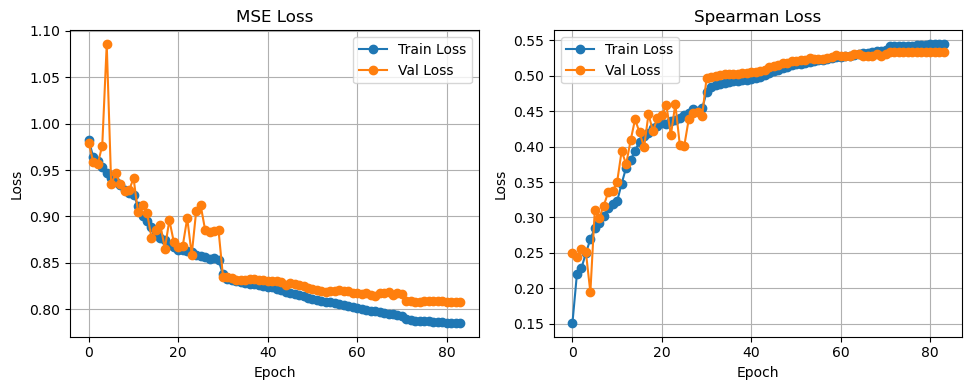

EarlyStopping counter: 10/10
‚õî Early stopping triggered.


In [86]:
import torch
import csv
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
from operate_model import get_model_inputs,train_one_epoch,evaluate,predict,EarlyStopping,plot_losses

# ÈÇÑÂèØ‰ª•Áî® ops["get_model_inputs"] Áï∂ÈúÄË¶ÅÊôÇ‰ΩøÁî®

# üîß Ë®≠ÂÆöË£ùÁΩÆ
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"‚úÖ Using device: {device}")

# üîß ÂàùÂßãÂåñÊ®°Âûã & ÂÑ™ÂåñÂô®
model = VisionMLPModelWithCoord().to(device)
get_model_inputs(model)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()
#loss_fn = spearman_loss

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
early_stopper = EarlyStopping(patience=10)

# üîß ÂÑ≤Â≠ò log ÁöÑË®≠ÂÆö
log_file = open("training_log.csv", mode="w", newline="")
csv_writer = csv.writer(log_file)
csv_writer.writerow(["Epoch", "Train Loss", "Val Loss", "Val Spearman", "Learning Rate"])

# üîß Áî®‰æÜÁï´Âúñ
train_losses = []
val_losses = []

train_spearmanes = []
val_spearmanes = []
# üîÅ ÈñãÂßãË®ìÁ∑¥
num_epochs = 150
best_val_loss = float('inf')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
display(fig)

for epoch in range(num_epochs):
    train_loss, train_spearman = train_one_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_spearman = evaluate(model, val_loader, loss_fn, device)

    # ‚úÖ ÂÑ≤Â≠òÊúÄÂ•ΩÁöÑÊ®°Âûã
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")
        print("‚úÖ Saved best model!")

    # ‚úÖ Ë™øÊï¥Â≠∏ÁøíÁéá
    scheduler.step(val_loss)

    # ‚úÖ ÂØ´ÂÖ• CSV log
    lr = optimizer.param_groups[0]['lr']
    csv_writer.writerow([epoch+1, train_loss, val_loss, val_spearman, lr])

    # ‚úÖ Âç∞ epoch ÁµêÊûú
    print(f"Epoch {epoch+1}/{num_epochs} | loss: {train_loss:.4f} | val_loss: {val_loss:.4f} | œÅ: {val_spearman:.4f} | lr: {lr:.2e}")

    # ‚úÖ Êõ¥Êñ∞ loss list ‰∏¶Áï´Âúñ

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_spearmanes.append(train_spearman)
    val_spearmanes.append(val_spearman)
    
    # Êõ¥Êñ∞ Loss Âúñ
    axes[0].clear()  # Ê∏ÖÈô§‰πãÂâçÁöÑÁπ™Âúñ
    plot_losses(train_losses, val_losses, ax=axes[0], title="MSE Loss")

    # Êõ¥Êñ∞ Spearman Âúñ
    axes[1].clear()
    plot_losses(train_spearmanes, val_spearmanes, ax=axes[1], title="Spearman Loss")
    
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)  # Ê∏ÖÈô§‰πãÂâçÁöÑËº∏Âá∫
    display(fig)
    plt.pause(0.1)  # Êö´ÂÅú‰∏Ä‰∏ã‰ª•‰æøÊõ¥Êñ∞Áï´Èù¢

    # ‚úÖ Early stopping
    early_stopper(val_loss)
    if early_stopper.early_stop:
        print("‚õî Early stopping triggered.")
        break

# ‚úÖ ÈóúÈñâ log Ê™îÊ°à
log_file.close()


ÔºÉ# Prediction

In [87]:
# ===== ÈúÄË¶ÅÁöÑ Libraries =====
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
import csv

# ===== ËºâÂÖ•Ë®ìÁ∑¥Â•ΩÁöÑÊ®°ÂûãÊ¨äÈáç =====
from hevisum_dataset import importDataset

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"‚úÖ Using device: {device}")

model.load_state_dict(torch.load("./best_model.pt"))
model.eval()


‚úÖ Using device: mps


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_25126/2149826985.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("./best_mod

VisionMLPModelWithCoord(
  (encoder_spot): CNNEncoder(
    (cnn): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU()
      (11): AdaptiveAvgPool2d(output_size=(1, 1))
    )
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear): Linear(in_features=64, out_features=64, bias=True)
  )
  (encoder_subtiles

In [88]:

# ‚úÖ ÂÆâÂÖ®ËΩâÊèõÔºöÈÅøÂÖç ToTensor() Â∞ç Tensor Â§±Êïà
class SafeTransform:
    def __init__(self):
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
        ])

    def __call__(self, img):
        if isinstance(img, torch.Tensor):
            return img  # Â∑≤ÊòØ TensorÔºå‰∏çÂÜçËΩâÊèõ
        return self.transform(img)

# ‚úÖ Dataset ÂÆöÁæ©
class importDataset(Dataset):
    def __init__(self, center_tile, subtiles, neighbor_tiles, label, meta=None, transform=None):
        self.center_tile = center_tile
        self.subtiles = subtiles
        self.neighbor_tiles = neighbor_tiles
        self.label = label
        self.meta = meta if meta is not None else [None] * len(center_tile)

        self.transform = transform or SafeTransform()

    def __len__(self):
        return len(self.center_tile)

    def __getitem__(self, idx):
        # ‚úÖ ÂÆâÂÖ®ËΩâÊèõ‰∏≠ÂøÉ tile
        center_tile = self.transform(self.center_tile[idx])  # shape: (3, H, W)

        # ‚úÖ Subtiles: List of (H, W, 3)
        subtiles = torch.stack([self.transform(tile) for tile in self.subtiles[idx]])  # (9, 3, h, w)

        # ‚úÖ Neighbor tiles: List of (H, W, 3)
        neighbor_tiles = torch.stack([self.transform(tile) for tile in self.neighbor_tiles[idx]])  # (8, 3, H, W)

        # ‚úÖ Label
        label = torch.tensor(self.label[idx], dtype=torch.float32)

        # ‚úÖ Normalized coordinates (x, y)
        meta = self.meta[idx]  # already normalized
        meta_tensor = torch.tensor(meta, dtype=torch.float)


        return {
            'center_tile': center_tile,
            'subtiles': subtiles,
            'neighbor_tiles': neighbor_tiles,
            'label': label,
            'coords': meta_tensor
        }
test_data = torch.load("./test_dataset.pt")
test_df_scaled = scale_meta(test_data['meta_info'])
print(df_scaled)
test_dataset = importDataset(
    center_tile=test_data['tiles'],
    subtiles=test_data['subtiles'],
    neighbor_tiles=test_data['neighbor_tiles'],
    label=np.zeros((len(test_data['tiles']), 35)),  # dummy label
    meta=test_df_scaled[['x_norm', 'y_norm']].astype(float).to_numpy()
)

/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_25126/2977732085.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load("./test_dataset.pt")


     slide_id     x     y     x_std     y_std    x_norm    y_norm
0         S_1  1554  1297  1.015115  0.468132  0.815877  0.585326
1         S_1   462  1502 -1.706209  1.191686  0.087392  0.754328
2         S_1  1488  1548  0.850639  1.354045  0.771848  0.792251
3         S_1  1725  1182  1.441256  0.062235  0.929953  0.490519
4         S_1   581  1113 -1.409655 -0.181303  0.166778  0.433636
...       ...   ...   ...       ...       ...       ...       ...
8344      S_6  1173   842  0.935331 -1.162485      0.75  0.200299
8345      S_6  1237   775  1.479388 -1.608359  0.887931  0.100149
8346      S_6   903   953 -1.359909 -0.423799  0.168103  0.366218
8347      S_6   954  1310 -0.926364  1.951975  0.278017  0.899851
8348      S_6  1186   864  1.045843 -1.016079  0.778017  0.233184

[8349 rows x 7 columns]


In [76]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [89]:
test_dataset[0]

{'center_tile': tensor([[[0.6627, 0.6235, 0.6000,  ..., 0.8118, 0.8118, 0.8039],
          [0.7176, 0.6471, 0.6314,  ..., 0.7490, 0.7412, 0.7412],
          [0.7725, 0.7333, 0.7255,  ..., 0.6627, 0.6706, 0.6784],
          ...,
          [0.6392, 0.5294, 0.4196,  ..., 1.0000, 0.9765, 0.9137],
          [0.6392, 0.5373, 0.4431,  ..., 1.0000, 0.9843, 0.9529],
          [0.6627, 0.5608, 0.4824,  ..., 0.9608, 0.9608, 0.9529]],
 
         [[0.4431, 0.4039, 0.3804,  ..., 0.5137, 0.5137, 0.5059],
          [0.5137, 0.4431, 0.4275,  ..., 0.5059, 0.4980, 0.4980],
          [0.5765, 0.5373, 0.5294,  ..., 0.4275, 0.4353, 0.4431],
          ...,
          [0.3961, 0.2863, 0.1765,  ..., 0.7725, 0.7490, 0.6863],
          [0.3882, 0.2863, 0.1922,  ..., 0.7725, 0.7569, 0.7255],
          [0.4196, 0.3098, 0.2314,  ..., 0.7333, 0.7333, 0.7255]],
 
         [[0.7176, 0.6784, 0.6549,  ..., 0.7725, 0.7725, 0.7647],
          [0.8039, 0.7333, 0.7176,  ..., 0.7412, 0.7333, 0.7333],
          [0.8431, 0.8039

In [ ]:
# Ê≠£Á¢∫ÊñπÂºè

raw_coords = []
for _meta in test_data['meta_info']:
    if _meta is not None:
        _, x, y = _meta
    else:
        x, y = 0, 0
    raw_coords.append([x, y])

raw_coords = np.array(raw_coords)


coord_scaler = StandardScaler()
normalized_coords = coord_scaler.fit_transform(raw_coords)

# ====== Step 2: Âª∫Á´ã Dataset ======
test_dataset = importDataset(
    center_tile=test_data['tiles'],
    subtiles=test_data['subtiles'],
    neighbor_tiles=test_data['neighbor_tiles'],
    label=np.zeros((len(test_data['tiles']), 35)),  # dummy label
    meta=normalized_coords
)


test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_85179/984921605.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load("../test_dataset.pt")


In [90]:
test_preds = predict(model, test_loader, device)


In [93]:
test_preds

array([[-0.50531554,  1.3433596 , -0.36959076, ...,  0.6992624 ,
         1.0667155 ,  1.0731885 ],
       [-0.3066737 ,  1.7276028 , -0.11883691, ...,  0.6356604 ,
         0.7806695 ,  1.3318541 ],
       [ 2.5736048 , -0.9990951 ,  2.3809388 , ..., -0.53300667,
         0.5083197 , -0.07627928],
       ...,
       [ 0.22497565, -0.38909814,  0.2565626 , ..., -0.10812673,
        -0.38676855, -0.57559216],
       [ 0.7598402 , -0.07050502,  0.74871826, ...,  0.31519344,
         0.702511  ,  1.0821053 ],
       [ 1.3844723 , -0.70164156,  1.3178363 , ..., -0.33409876,
         0.01571906, -0.33073413]], dtype=float32)

In [94]:
import os
from revert_predict_data import revert_prediction_array

test_predsÔºøre = revert_prediction_array(test_preds)

In [95]:
test_predsÔºøre

array([[ 2.92071104e-02,  1.98751092e-01,  5.58521748e-02, ...,
         8.84759426e-03,  1.83676481e-02,  8.36393833e-02],
       [ 9.69842672e-02,  2.32559204e-01,  1.14076257e-01, ...,
         8.37266445e-03,  1.51764154e-02,  9.49023962e-02],
       [ 1.76574492e+00,  1.17970705e-02,  9.02441502e-01, ...,
        -3.13580036e-04,  1.21473074e-02,  3.49735022e-02],
       ...,
       [ 3.01160693e-01,  5.74718714e-02,  2.07298398e-01, ...,
         2.83575058e-03,  2.25543976e-03,  1.45205259e-02],
       [ 5.44933558e-01,  8.21410418e-02,  3.41432571e-01, ...,
         5.98323345e-03,  1.43061876e-02,  8.40257406e-02],
       [ 8.88014793e-01,  3.38176489e-02,  5.15227914e-01, ...,
         1.15954876e-03,  6.69133663e-03,  2.44994164e-02]], dtype=float32)

In [96]:
import h5py

# ==== ËÆÄÂèñ test spot index Áî®ÊñºÂ∞çÊáâ ID ====
with h5py.File("./elucidata_ai_challenge_data.h5", "r") as f:
    test_spots = f["spots/Test"]
    test_spot_table = pd.DataFrame(np.array(test_spots['S_7']))  # Example: S_7


ensemble_df = pd.DataFrame(test_predsÔºøre, columns=[f"C{i+1}" for i in range(test_predsÔºøre.shape[1])])
ensemble_df.insert(0, 'ID', test_spot_table.index)
ensemble_df.to_csv("submission.csv", index=False)
print("‚úÖ Saved submission.csv")


‚úÖ Saved submission.csv
